In [1]:
# 1.- Importar librerias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2.- Cargar datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape
x_test.shape

(10000, 28, 28)

In [3]:
# 3.- Preparar los datos
# Estandarizar los valores de los pixeles (0-255) hacer entre 0 y 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
# 4.- Cambiar la forma de los datos de entrada: 1:B/N
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
# 5.- Arquitectura de red neuronal convolucional
capa_convolucion = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
capa_pooling = tf.keras.layers.MaxPooling2D(pool_size=(2,2))
capa_flatten = tf.keras.layers.Flatten()
capa_oculta = tf.keras.layers.Dense(units=64, activation='relu')
capa_salida = tf.keras.layers.Dense(units=10, activation='softmax')

modelo = tf.keras.models.Sequential([capa_convolucion, capa_pooling, capa_flatten, capa_oculta, capa_salida])

C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 6.- Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# 7.- Pasar las salidas a categoricas
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
# 8.- Entrenar el modelo
modelo.fit(x_train, y_train, epochs=15, batch_size=128)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9663 - loss: 0.0970
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9695 - loss: 0.0897
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9732 - loss: 0.0802
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9755 - loss: 0.0722
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9754 - loss: 0.0709
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9782 - loss: 0.0634
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9807 - loss: 0.0567
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - loss: 0.0523
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9857 - loss: 0.0452
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9847 - loss: 0.0466
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9870 - loss: 0.0388
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

In [12]:
# 9.- Evaluar modelo
perdida = modelo.evaluate(x_test, y_test)
print(f'Pérdida: {perdida[0]}')
print(f'Exactitud: {perdida[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9101 - loss: 0.4399
Pérdida: 0.4265824258327484
Exactitud: 0.9120000004768372


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
La clase de predicción es: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
La clase es: 8
El tipo de ropa es: Bag


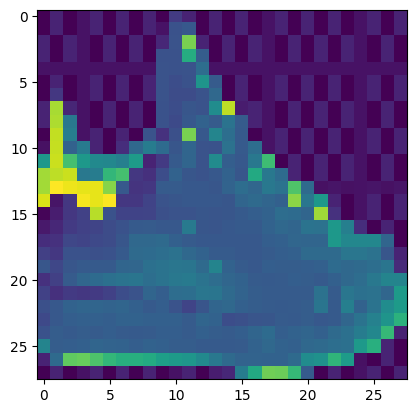

In [17]:
# Predicción
# -----------------------------------------------------------
# 10.- Preparar la imagen
import cv2 as cv
imagen = cv.imread('./images/sneaker.png')

# 1.- filtro de desenfoque
imagen = cv.GaussianBlur(imagen, (3,3), 0)

# 2.- convertir a escala de grises
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

# 3.- tamaño de la imagen (28,28)
imagen = cv.resize(imagen,(28,28))

# 4.- inversion de colores (intensidad de gris)
imagen = cv.bitwise_not(imagen)

# 5.- Color
imagen = np.expand_dims(imagen, axis=-1)

# 6.- Mostar la imagen
plt.imshow(imagen)

# -----------------------------------------------------------

# 11.- Lote
imagen = np.expand_dims(imagen, axis=0)
prediccion = modelo.predict(imagen)
clase = np.argmax(prediccion[0])

# 12.- Resultado
print(f'La clase de predicción es: {prediccion}')
print(f'La clase es: {clase}')
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f'El tipo de ropa es: {clases[clase]}')